## Making Voronoi Diagrams
Making Voronoi Diagrams with Statsbomb 360 data

In [1]:
from mplsoccer import Sbopen, VerticalPitch
import numpy as np
import matplotlib.pyplot as plt

# The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.

### Opening data
For this task use Statsbomb 360 data form the Sweden against Switzerland game at the Women’s UEFA Euro 2022. First, make the plot for Bennison’s goal from that game. Identify the id of this event. As the next step open the 360 data. Within the 360 data, the df_frame stores player location data, and df_visible stores areas tracked by Statsbomb during the match. From the latter take the visible area only for this specific event, and store it as a numpy array with apeces coordinates stored in separate rows.

In [2]:
# Instantiate mplsoccer parser
parser = Sbopen()

# open the event dataset for the game (i.e. 3835331)
df_event = parser.event(3835331)[0]
df_event.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_offensive,foul_won_defensive,block_offensive,foul_committed_advantage,foul_won_advantage,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,block_save_block,dribble_nutmeg
1611,67604bd5-eae8-48db-82e4-d551dbaf9a67,1612,1,00:44:32,44,32,110,0.790138,3835331,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,24b3e4cb-11f9-4457-9825-1d2e906af644,385,1,00:08:03,8,3,21,3.993873,3835331,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,9e22bd09-453f-4cff-9e89-c2ead6f3b4d8,568,1,00:13:26,13,26,31,NaN,3835331,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# find Bennison goal
event = (df_event
         .query("outcome_name == 'Goal' and player_name == 'Hanna Ulrika Bennison'")
        #  .loc[df_event["outcome_name"] == 'Goal']
        #  .loc[df_event["player_name"] == 'Hanna Ulrika Bennison']
         )
# save it's id
event_id = event["id"].iloc[0]
event_id

'add42adc-73cf-4e98-b712-6f5020ce74ce'

In [4]:
# open 360
df_frame, df_visible = parser.frame(3835331)
# get visible area
visible_area = (np.array(df_visible
                         .loc[lambda df: df["id"] == event_id]['visible_area']
                         .iloc[0])
                         .reshape(-1, 2)
                )
visible_area

array([[ 99.2288161 ,  68.48130216],
       [ 77.58975181,  54.10357966],
       [102.61304498,   0.        ],
       [120.        ,   0.        ],
       [120.        ,  48.45396715],
       [ 99.2288161 ,  68.48130216]])

### Plotting visible area
To investigate the area that Statsbomb managed to catch, plot it using polygon method of mplsoccer.

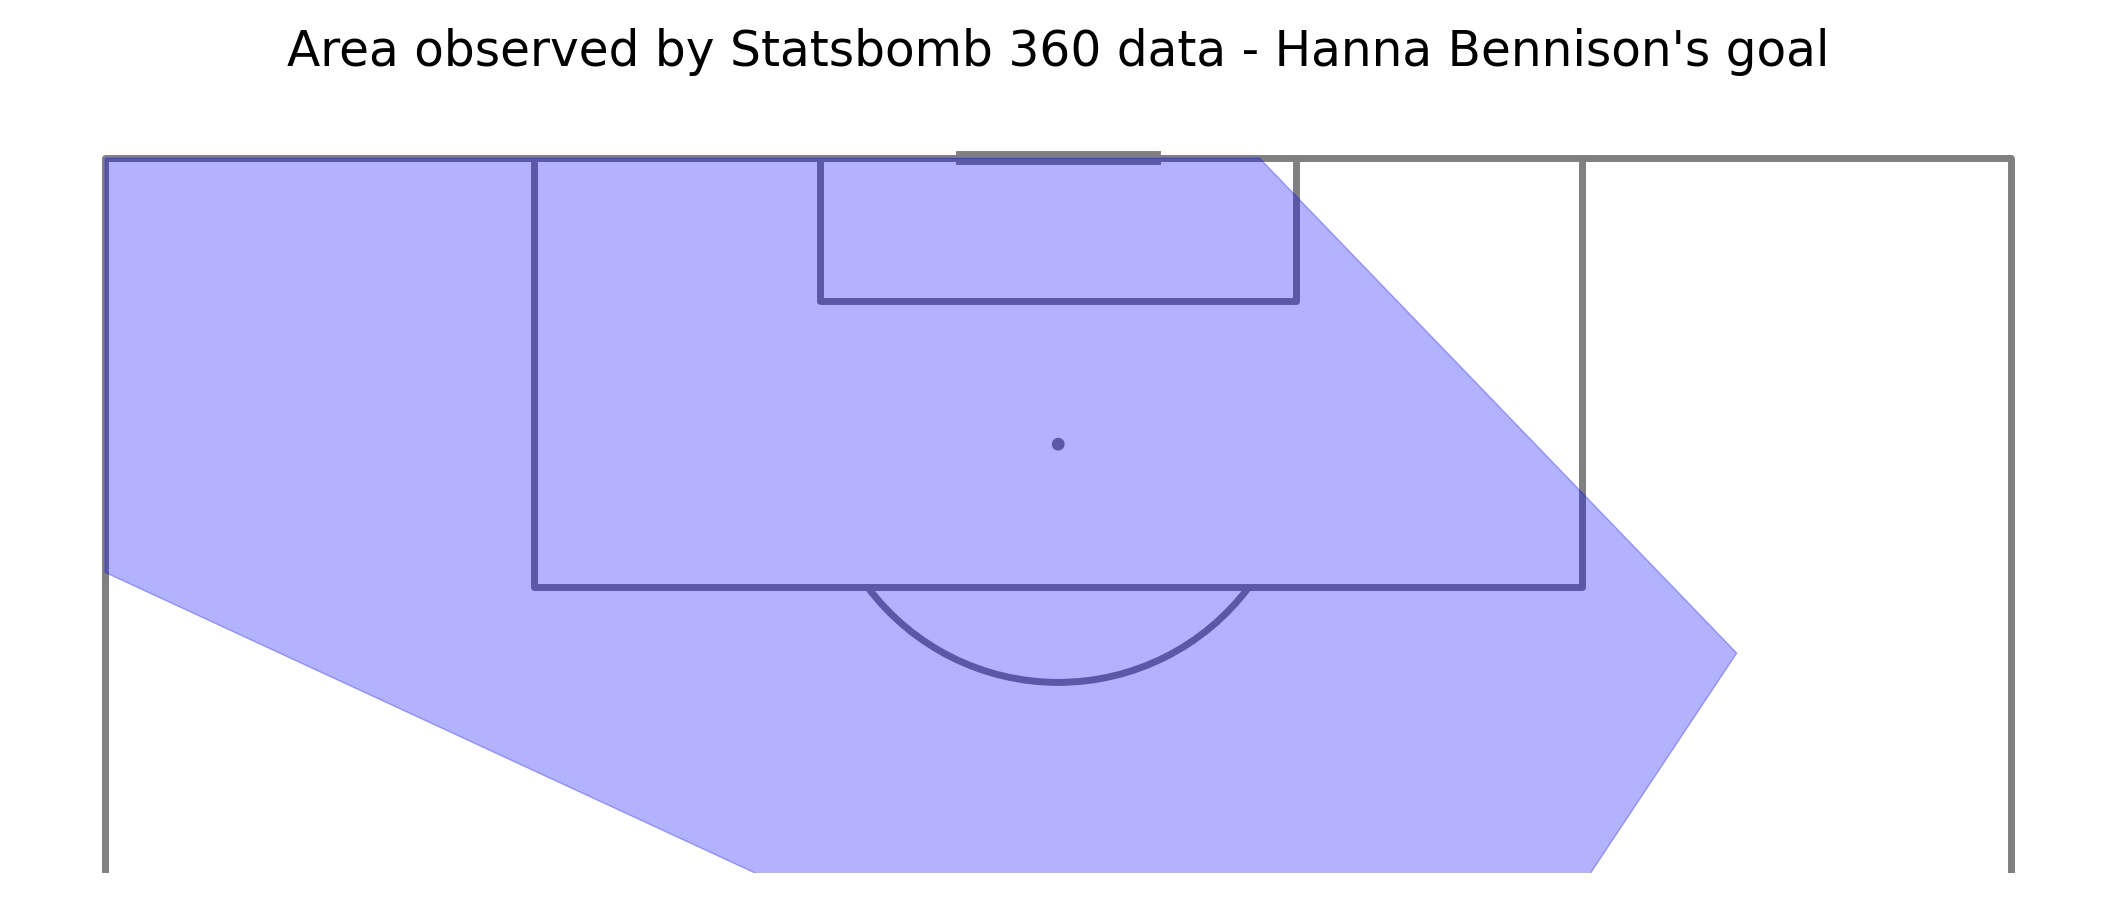

In [5]:
pitch  = VerticalPitch(line_color='grey', line_zorder = 1, half = True, pad_bottom=-30, linewidth=5)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
# add visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
fig.suptitle("Area observed by Statsbomb 360 data - Hanna Bennison's goal", fontsize = 35)
plt.show()

### Plotting player position
To get a better understanding of Statsbomb 360 data plot player position during the shot as well as shot trajectory.

In [6]:
# get all player position for this event
player_position = df_frame.loc[lambda df_: df_["id"] == event_id]
# get swedish player position
sweden = player_position.loc[lambda df_:df_["teammate"] == True]
# get swiss player positions
swiss = player_position.loc[lambda df_:df_["teammate"] == False]

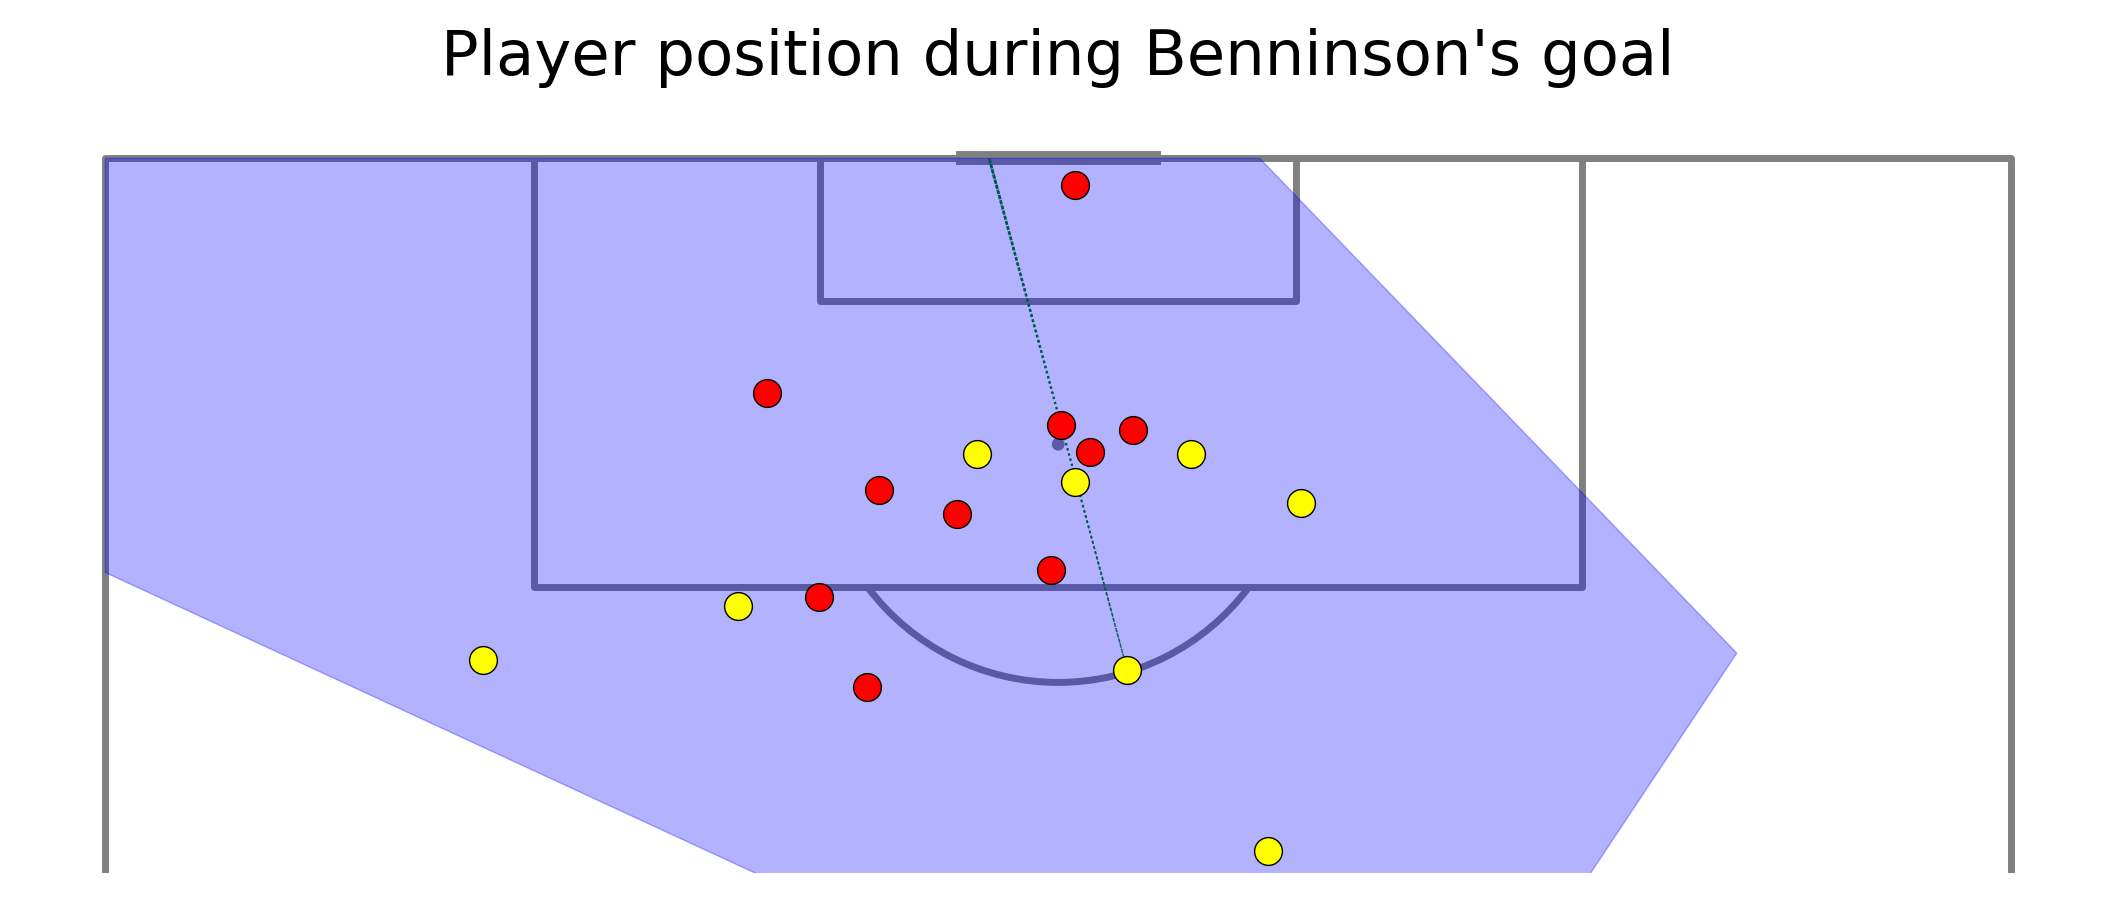

In [7]:
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plot visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
# plot sweden players - yellow
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
# plot swiss players - red
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
# add shot
pitch.lines(event.x, event.y,event.end_x, event.end_y, 
            comet = True, color='green', ax=ax['pitch'], 
            zorder = 1, linestyle = ':', lw = 2)

fig.suptitle("Player position during Benninson's goal", fontsize = 45)
plt.show()

### Plotting Voronoi diagrams for 1 team
Make Voronoi diagrams for the Swedish team. This will be done using voronoi method. Then, clip the diagram to the restricted area only since players in the other areas will affect pitch control.

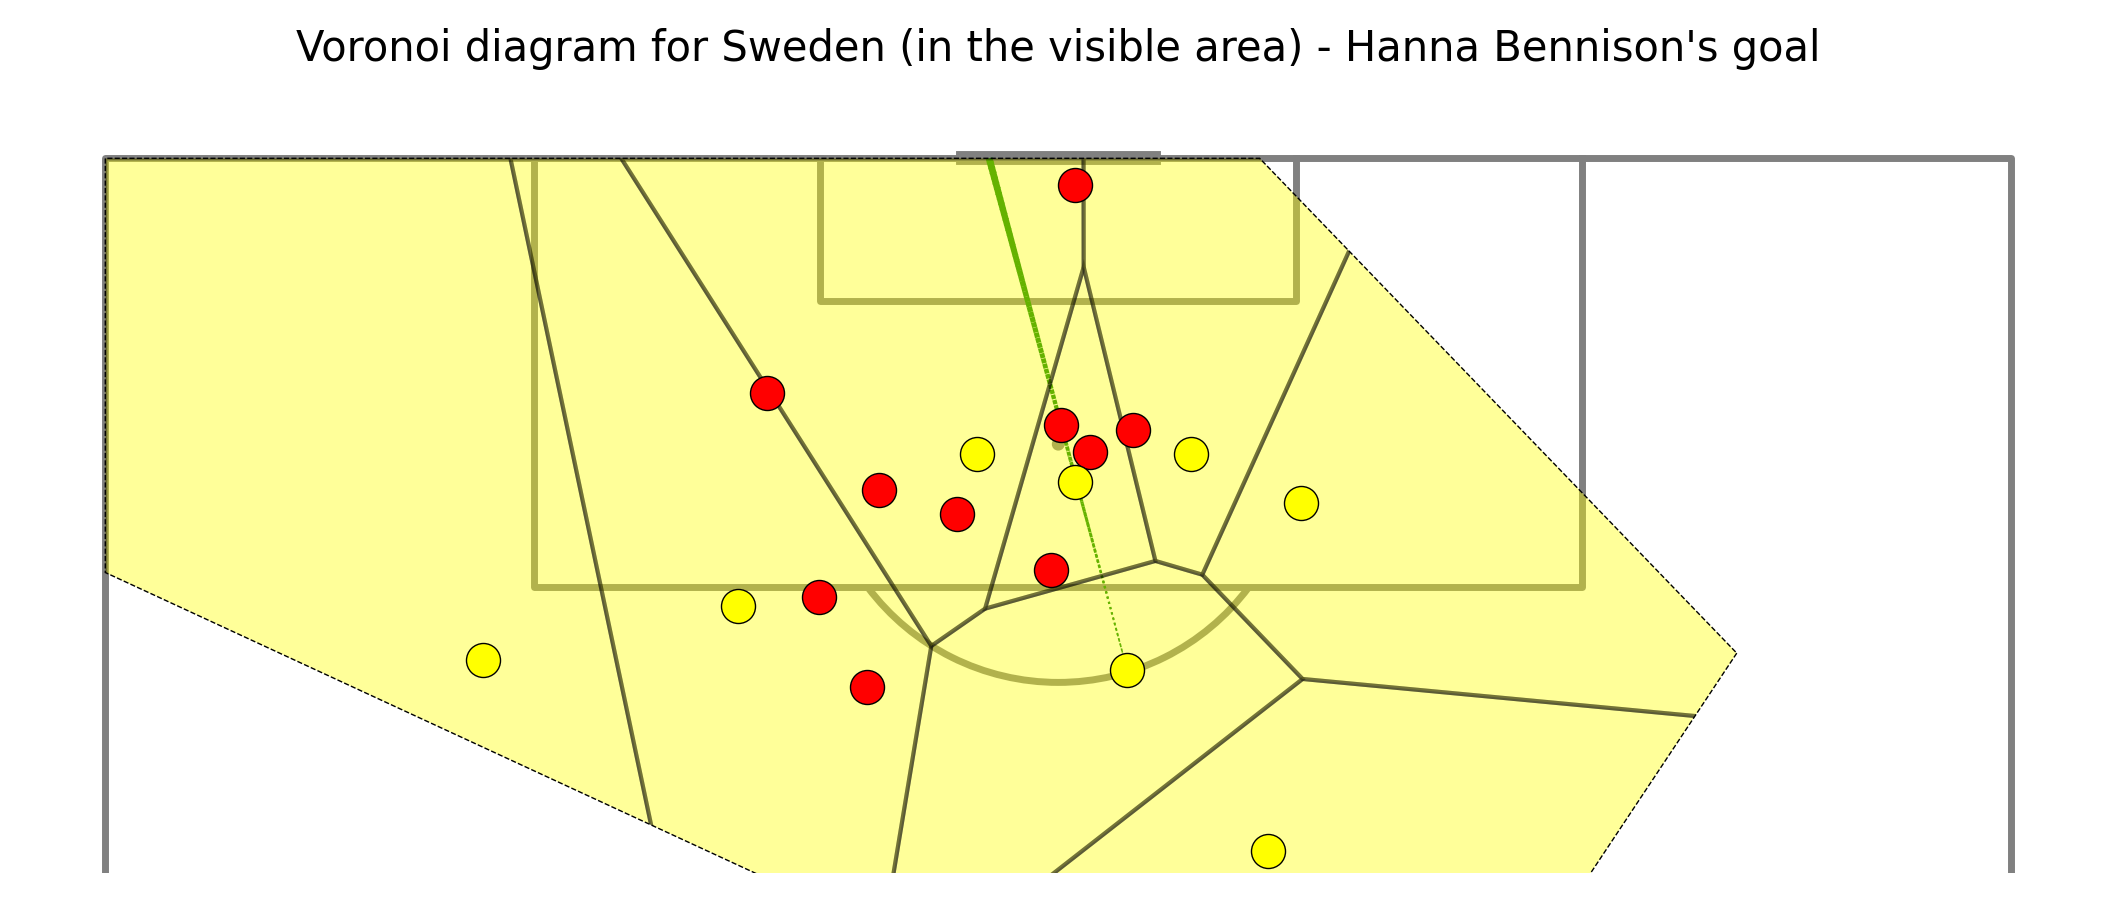

In [8]:
# Voronoi data for Sweden
team1, team2 = pitch.voronoi(sweden.x, sweden.y,sweden.teammate)

# figure for plot
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plot voronoi diagrams as polygons
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# mark visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)
# plot swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)
# plot swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)
# plot shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# limit voronoi diagram to polygon
for p1 in t1:
    p1.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Sweden (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()

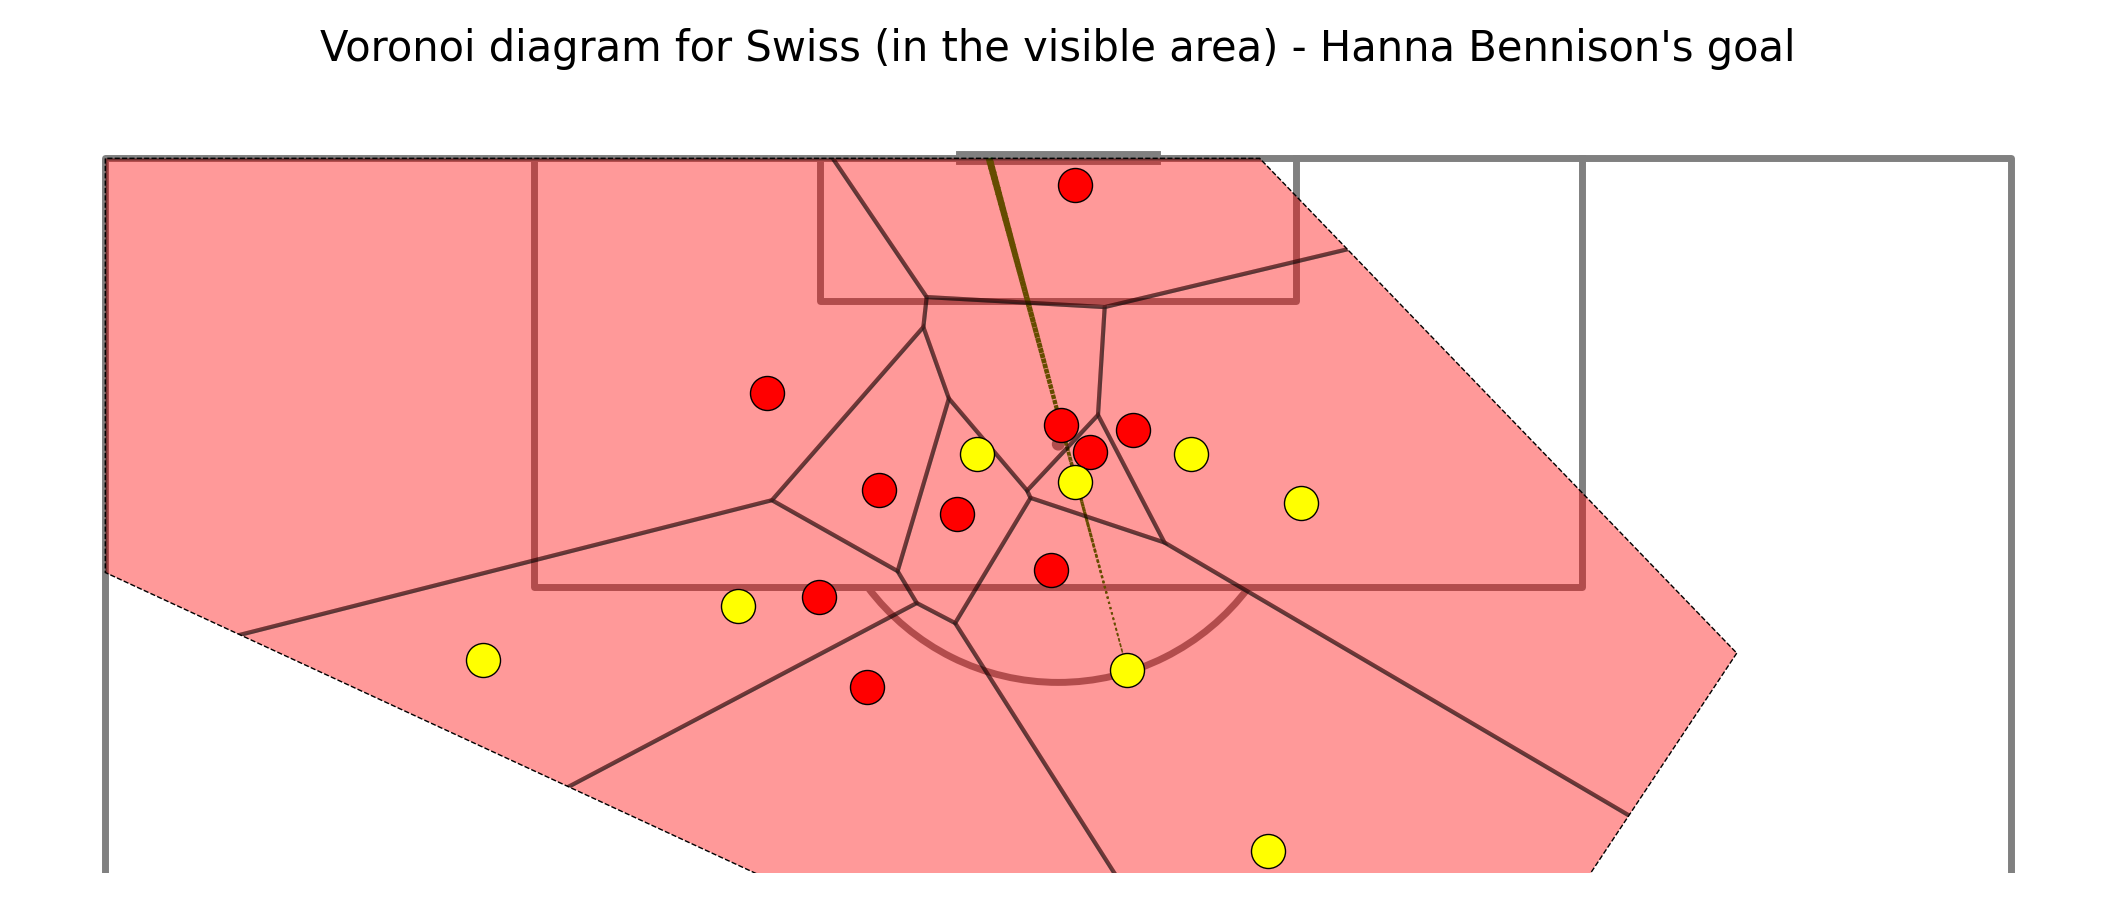

In [13]:
# Voronoi data for Swiss
team1, team2 = pitch.voronoi(swiss.x, swiss.y, swiss.teammate)

# figure for plot
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plot voronoi diagrams as polygons
t1 = pitch.polygon(team2, ax = ax["pitch"], color = 'red', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# mark visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)
# plot swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)
# plot swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)
# plot shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# limit voronoi diagram to polygon
for p1 in t1:
    p1.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Swiss (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()

### Plotting Voronoi diagrams for both teams
Differentiation between areas can be accomplish allowing marking of areas that each player was the closest to at the moment in question. To do this a dataframe with both teams players’ positions is applied.

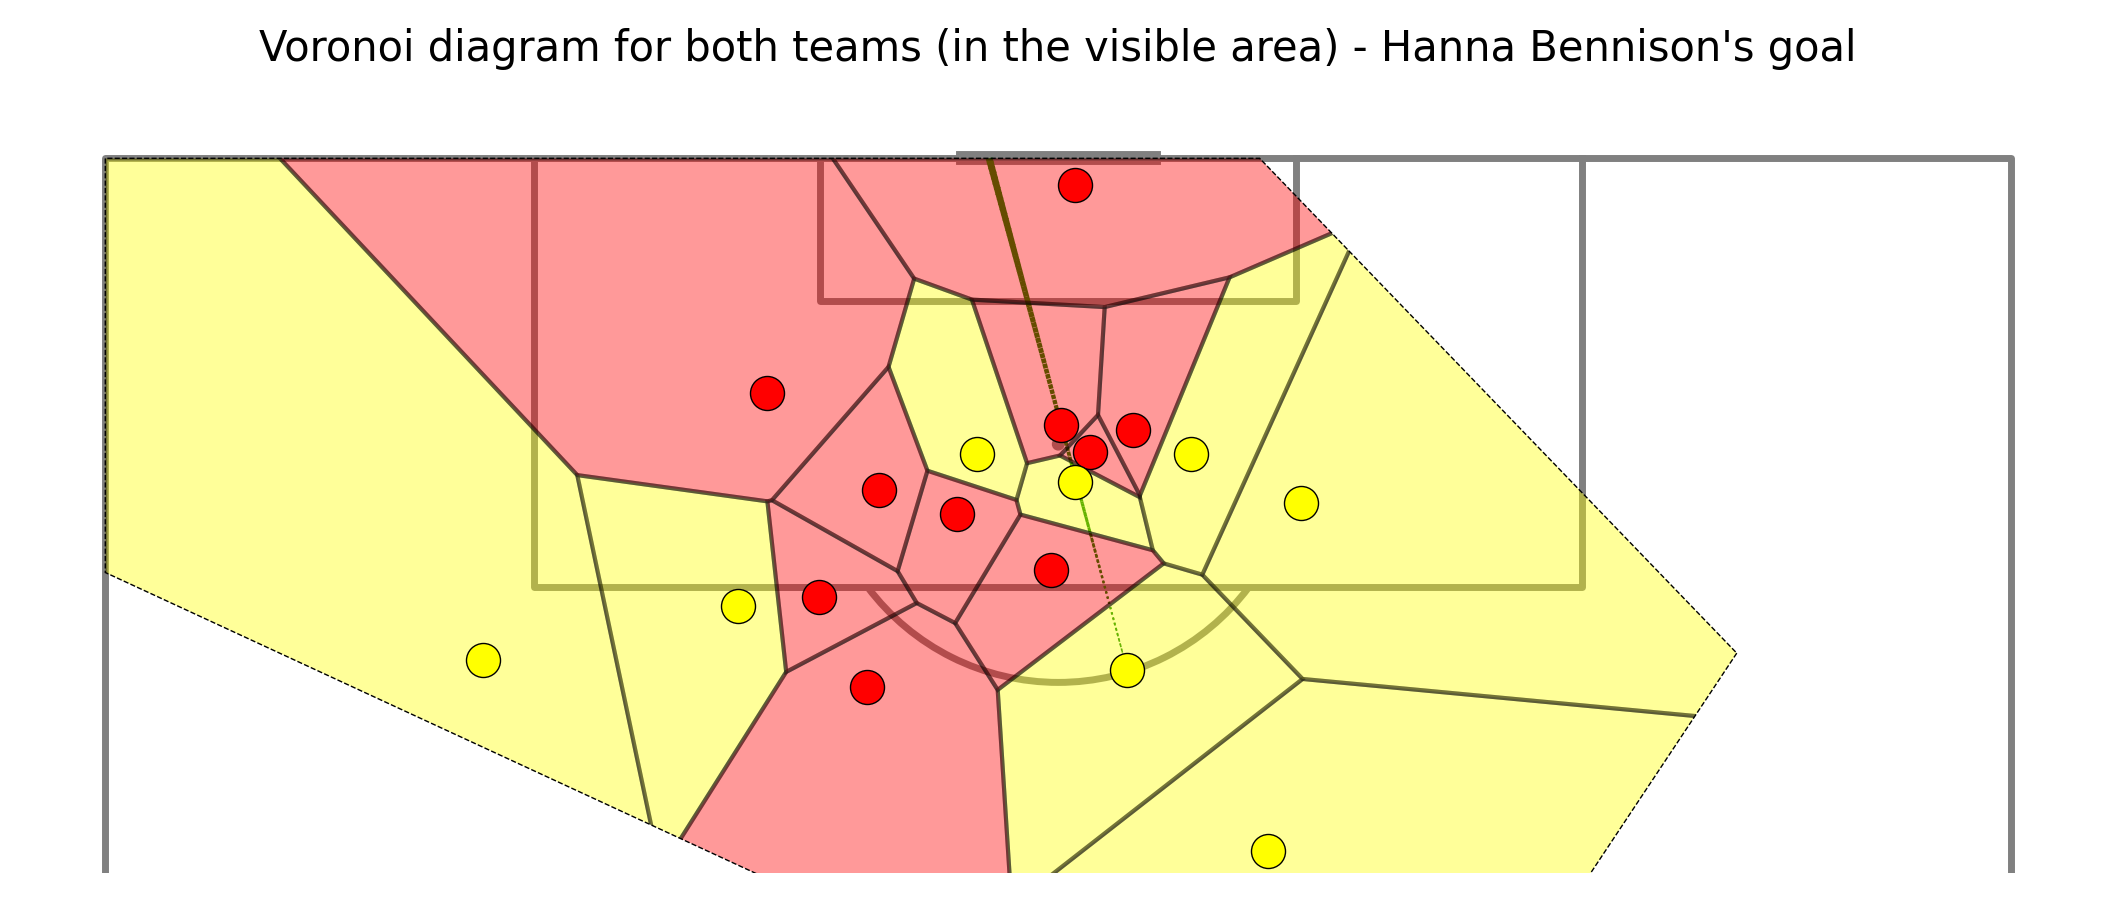

In [14]:
# voronoi for both teams using player_position dataframe
team1, team2 = pitch.voronoi(player_position.x, player_position.y,
                         player_position.teammate)

# figure creation for plot
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# add sweden, team 1 or the true case
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# add switzerland, team 2 or the false case
t2 = pitch.polygon(team2, ax = ax["pitch"], color = 'red', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# mark visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)
# plot swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)
# plot swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)
# plot shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# clip sweden
for p1 in t1:
    p1.set_clip_path(visible[0])
#clip sswitzerland
for p2 in t2:
    p2.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for both teams (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()